In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
events_data = pd.read_csv(".\event_data_train.csv")

In [7]:
events_data.head(10)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [5]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [6]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit = 's')

In [8]:
events_data['date'].max()

Timestamp('2018-05-19 23:33:31')

In [9]:
events_data['day'] = events_data['date'].dt.date

In [10]:
events_data.head(4)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15


In [17]:
events_data.groupby('day') \
    .user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

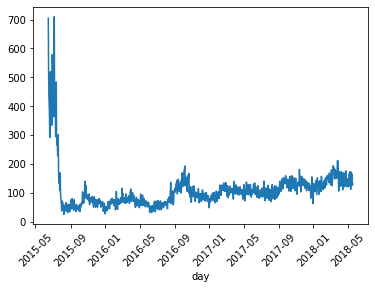

In [19]:
events_data.groupby('day') \
    .user_id.nunique().plot().tick_params(axis='x', rotation=45)

<AxesSubplot:>

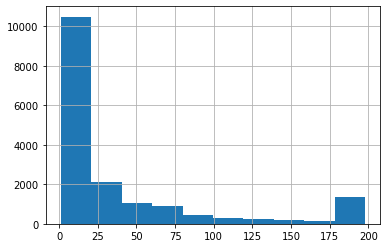

In [25]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id':'count'}) \
    .rename(columns = {'step_id':'passed_steps'}) \
    .passed_steps.hist()

## Pivot table

In [119]:
users_events_data = events_data.pivot_table(index = 'user_id',\
                        columns = 'action',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value=0).reset_index()

In [120]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [33]:
submissions_data = pd.read_csv(".\submissions_data_train.csv")

In [35]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit = 's')
submissions_data['day'] = submissions_data['date'].dt.date

In [36]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [38]:
users_scores = submissions_data.pivot_table(index = 'user_id', \
                                       columns = 'submission_status', \
                                       values = 'step_id', \
                                       aggfunc = 'count', \
                                       fill_value=0).reset_index()

In [41]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [55]:
gaps = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [57]:
gap_data = pd.Series(np.concatenate(gaps, axis = 0))

In [65]:
gap_data = gap_data / 24 /60 /60

<AxesSubplot:>

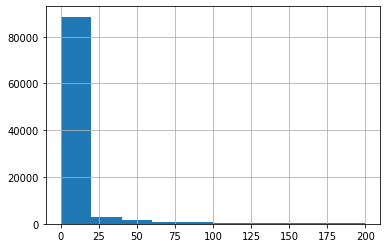

In [66]:
gap_data[gap_data < 200].hist()

In [69]:
gap_data.quantile(0.9)

18.325995370370403

In [70]:
events_data.sort_values(by=['timestamp'])

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480696,33375,1526772685,passed,11677,2018-05-19 23:31:25,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19


In [87]:
new = submissions_data[submissions_data.submission_status == 'correct'] \
    .groupby('user_id', as_index = True) \
    .agg({'step_id':'count'}) \
    .rename(columns = {'step_id':'correct_attempts'}) \
    [['correct_attempts']]

In [88]:
new.sort_values(by=['correct_attempts'], ascending = False).head()

,correct_attempts
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135


## Dropped

In [89]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [109]:
users_data = events_data.groupby('user_id', as_index = False) \
    .agg({'timestamp':'max'}).rename(columns = {'timestamp':'timestamp_max'})

In [110]:
max_timestamp = 1526772811
dropout_threshold = 30*24*60*60

In [111]:
users_data['is_gone_user'] = (max_timestamp - users_data.timestamp_max) > dropout_threshold

In [112]:
users_data.head(10)

,user_id,timestamp_max,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
5,8,1481466913,True
6,9,1484999497,True
7,11,1526140625,False
8,14,1436368676,True
9,16,1513162585,True


In [115]:
users_data = users_data.merge(users_scores, on='user_id', how = 'outer').head()

In [116]:
users_data = users_data.fillna(0)

In [117]:
users_data.head()

,user_id,timestamp_max,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [133]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns = {'day':'unique_days'})

In [134]:
users_days.head()

,user_id,unique_days
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [135]:
users_data = users_data.merge(users_events_data, how = 'outer')

In [136]:
users_data = users_data.merge(users_days, how = 'outer')

In [141]:
users_data.user_id.nunique()

19234

In [143]:
events_data.user_id.nunique()

19234

In [144]:
users_data['passed_course'] = users_data.passed > 170

In [145]:
users_data.head()

,user_id,timestamp_max,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,unique_days,passed_course
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1,False
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2,False
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2,False
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1,False


In [147]:
users_data.groupby('passed_course').count()

,user_id,timestamp_max,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,unique_days
passed_course,,,,,,,,,,
False,17809,5,5,5,5,17809,17809,17809,17809,17809
True,1425,0,0,0,0,1425,1425,1425,1425,1425
